# Project 3: 'Image Analysis'
## First Year Project  
### ITU, Spring 2021

This notebook contains all the code developed to explore, wrangle and analyse the raw data sets for our project, 'Image Analysis'.

Contributors:  
- Andy Bao Nguyen (anbn)
- Florian Micliuc (flmi)
- Mattias Wohlert (mawo) 
- Sofia Elena Terenziani (sote)

Created: 06-04-2021 

Last modified:

### Imports

In [110]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
from skimage import morphology
from scipy.spatial.distance import cdist
from scipy.stats.stats import mode
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

# Classifiers

In [77]:
df = pd.read_csv("../../../../iris.csv", sep = ",")

In [80]:
# going the pandas way
df_two_feats = df.drop(['sepal_width', 'petal_width'],axis=1)
print(df_two_feats)

     sepal_length  petal_length    species
0             5.1           1.4     setosa
1             4.9           1.4     setosa
2             4.7           1.3     setosa
3             4.6           1.5     setosa
4             5.0           1.4     setosa
..            ...           ...        ...
145           6.7           5.2  virginica
146           6.3           5.0  virginica
147           6.5           5.2  virginica
148           6.2           5.4  virginica
149           5.9           5.1  virginica

[150 rows x 3 columns]


   sepal_length  petal_length species
0           5.1           1.4  setosa
1           4.9           1.4  setosa
2           4.7           1.3  setosa
3           4.6           1.5  setosa
4           5.0           1.4  setosa


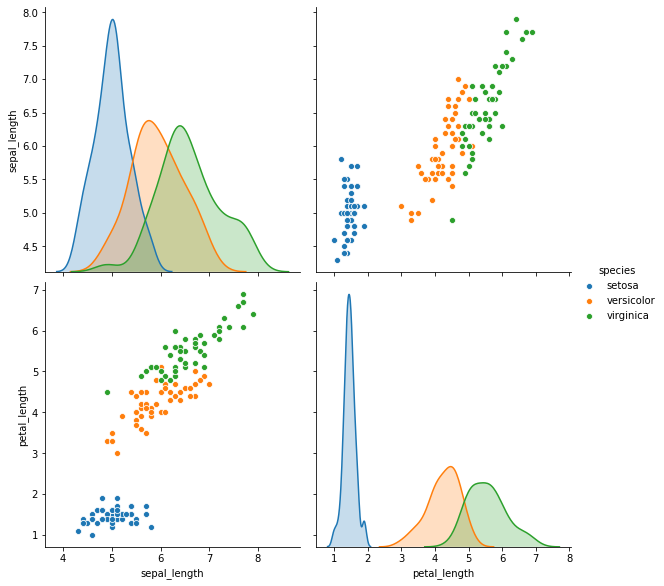

In [96]:
# Visualizing the distribution of categories before classifying
plot1 = df_two_feats[['sepal_length','petal_length','species']]
sns.pairplot(plot1, height=4, hue='species')
print(plot1.head())

In [72]:
# going the numpy way
iris = np.array(df)
setosa = iris[:,4] == 'setosa'
versicolor = iris[:,4] == 'versicolor'
virginica = iris[:,4] == 'virginica'
print(iris.shape)

iris_rows = iris[0:-1,:]
print(iris_rows)

(150, 5)


In [116]:
# defining features to use
X = df_two_feats[['sepal_length','petal_length']]
y = df_two_feats['species']

# splitting the set into two
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

# splitting the subset '_dev' into two: training and validation
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, train_size=7/8, stratify=y_dev)

StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=0.8)
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [117]:
# kNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1trained = knn1.fit(X_train, y_train)


In [73]:
#from Veronikas git

# Predict labels for each fold using the KNN algortihm
for train_index, test_val_index in kf.split(x, y):
    
    
    # split dataset into a train, validation and test dataset
    test_index, val_index = np.split(test_val_index, 2)
    
    x_train, x_val, x_test = x[train_index], x[val_index], x[test_index]
    y_train, y_val, y_test = y[train_index], y[val_index], y[test_index]
    
    # Train and test custom-made kNN classifier. In sklearn you would do this with three steps, fit(x_train, y_train), predict(x_val), predict(x_test)
    y_pred_val, y_pred_test = util.knn_classifier(x_train, y_train, x_val, x_test, k)
    
    # Calculate accuracy
    acc_val[index_fold] = accuracy_score(y_val,y_pred_val)
    acc_test[index_fold] = accuracy_score(y_test,y_pred_test)
   
    index_fold += 1
    
print(acc_val)
print(acc_test)

NameError: name 'kf' is not defined